In [45]:
import os
os.chdir('transforms')

In [43]:
from utils import sample, retrieve, cumulative_mean, rmse
from dirichlet_symmetric_utils import get_dirichlet_symmetric_rmse, get_dirichlet_symmetric_params
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [76]:
from cmdstanpy import CmdStanModel
model = CmdStanModel(stan_file = 'transforms/simplex/stan/dirichlet_symmetric.stan',
                     cpp_options={'STAN_THREADS':'true'})
fit = model.sample(data=dict(alpha=[0.1]*10, N=10))

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [87]:
fit.draws_xr()

<xarray.Dataset>
Dimensions:  (draw: 1000, chain: 4, x_dim_0: 10)
Coordinates:
  * chain    (chain) int64 1 2 3 4
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999
Dimensions without coordinates: x_dim_0
Data variables:
    x        (chain, draw, x_dim_0) float64 0.001692 0.5763 ... 0.00114
Attributes:
    stan_version:        2.29.2
    model:               dirichlet_symmetric_model
    num_draws_sampling:  1000

In [4]:
sample(transform_category="simplex", transform="softmax", evaluating_model="dirichlet_symmetric", 
       parameters={'alpha':[1]*10, 'N':10}, n_iter = 1000, n_repeat = 1)

  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.47it/s]

In [7]:
sample(transform_category="simplex", transform="softmax", evaluating_model="dirichlet_symmetric", 
       parameters={'alpha':[1]*10, 'N':10}, n_iter = 1000, n_repeat = 1)

idata = retrieve(transform_category="simplex", transform="softmax", evaluating_model="dirichlet_symmetric", 
       parameters={'alpha':[1]*10, 'N':10}, n_repeat = 1)

In [13]:
# import arviz as az
# extra_kwargs = {"color": "lightsteelblue"}
# az.plot_ess(
#      idata, kind="evolution", var_names=["x"],
#      color="royalblue", extra_kwargs=extra_kwargs
# );

In [59]:
from tqdm import tqdm

ess_stickbreaking=[]
for i in tqdm(range(100)):
    sample(transform_category="simplex", transform="stickbreaking", evaluating_model="dirichlet_symmetric", 
       parameters={'alpha':[1]*10, 'N':10}, n_iter = 1000, n_repeat = 1)

    idata = retrieve(transform_category="simplex", transform="stickbreaking", evaluating_model="dirichlet_symmetric", 
       parameters={'alpha':[1]*10, 'N':10}, n_repeat = 1)
    ess_stickbreaking.append(az.ess(idata).x)

  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:compiling stan file /Users/meenaljhajharia/cmdstan/transforms/transforms/simplex/stickbreaking/dirichlet_symmetric.stan to exe file /Users/meenaljhajharia/cmdstan/transforms/transforms/simplex/stickbreaking/dirichlet_symmetric
INFO:cmdstanpy:compiled model executable: /Users/meenaljhajharia/cmdstan/transforms/transforms/simplex/stickbreaking/dirichlet_symmetric
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:12<00:00, 12.25s/it]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.68it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.63it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.60it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.59it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.69it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.71it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.66it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.65it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.60it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.60it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.61it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.61it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.55it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.57it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.58it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.53it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.54it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.49it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.48it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.51it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.49it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.45it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.30it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.20it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.20it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.30it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.33it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.32it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.39it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.32it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.40it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.43it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.00it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.36it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.35it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.34it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.30it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.31it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.24it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.29it/s]

  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.22it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.31it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.33it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.33it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.31it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.28it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.29it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.28it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.19it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.27it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.26it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.25it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.30it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.25it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.22it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.24it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.20it/s]

  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.24it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.18it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.16it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.17it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.18it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.14it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.18it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.18it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.17it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.13it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.17it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.12it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.16it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.19it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.15it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.16it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.11it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.15it/s]

  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.15it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



  0%|                                                     | 0/1 [00:00<?, ?it/s]INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.16it/s]


100%|█████████████████████████████████████████| 100/100 [01:41<00:00,  1.01s/it]


In [72]:
idata.posterior.x

<xarray.DataArray 'x' (chain: 4, draw: 1000, x_dim_0: 10)>
array([[[0.129897  , 0.109725  , 0.191588  , ..., 0.0135446 ,
         0.0386971 , 0.135365  ],
        [0.0528283 , 0.0282924 , 0.0360097 , ..., 0.279326  ,
         0.0856324 , 0.0246909 ],
        [0.0690479 , 0.062828  , 0.0635113 , ..., 0.154422  ,
         0.0403361 , 0.180848  ],
        ...,
        [0.0736696 , 0.0903368 , 0.0833506 , ..., 0.0169959 ,
         0.102782  , 0.101519  ],
        [0.00534335, 0.0698753 , 0.188741  , ..., 0.0190317 ,
         0.0798464 , 0.0759971 ],
        [0.00433862, 0.0733833 , 0.207973  , ..., 0.0182011 ,
         0.0521207 , 0.1137    ]],

       [[0.156229  , 0.122287  , 0.168853  , ..., 0.00492619,
         0.130782  , 0.0857551 ],
        [0.170649  , 0.0201722 , 0.0787052 , ..., 0.136527  ,
         0.0581773 , 0.0873196 ],
        [0.0500295 , 0.115839  , 0.157435  , ..., 0.041738  ,
         0.0729614 , 0.0810409 ],
...
        [0.273644  , 0.0237422 , 0.00279544, ..., 0.0979499 ,
         0.0964235 , 0.0111387 ],
        [0.00852949, 0.28262   , 0.0316542 , ..., 0.100347  ,
         0.222773  , 0.0231496 ],
        [0.0699864 , 0.0243372 , 0.274154  , ..., 0.10104   ,
         0.00455033, 0.0724258 ]],

       [[0.0164248 , 0.221476  , 0.201099  , ..., 0.136531  ,
         0.0168839 , 0.0659676 ],
        [0.183699  , 0.0278069 , 0.0342854 , ..., 0.0168273 ,
         0.314165  , 0.0782505 ],
        [0.051293  , 0.283063  , 0.137471  , ..., 0.0390318 ,
         0.0203738 , 0.0823867 ],
        ...,
        [0.062102  , 0.00346185, 0.142017  , ..., 0.114358  ,
         0.0229652 , 0.0299508 ],
        [0.081805  , 0.524234  , 0.00965678, ..., 0.00590953,
         0.112598  , 0.147919  ],
        [0.122556  , 0.00319466, 0.181158  , ..., 0.001557  ,
         0.0647738 , 0.15159   ]]])
Coordinates:
  * chain    (chain) int64 0 1 2 3
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999
  * x_dim_0  (x_dim_0) int64 0 1 2 3 4 5 6 7 8 9

In [60]:
data2 = np.asarray(ess_softmax_augmented).flatten()
data3 = np.asarray(ess_stickbreaking).flatten()

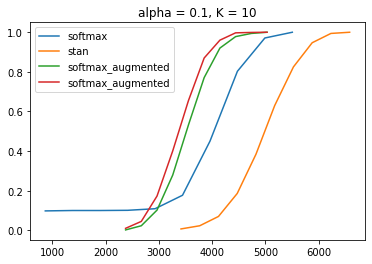

In [65]:
N = len(data)
count3, bins_count3 = np.histogram(data3, bins=10)
count2, bins_count2 = np.histogram(data2, bins=10)
count1, bins_count1 = np.histogram(data1, bins=10)
count, bins_count = np.histogram(data, bins=10)

pdf = count / sum(count)
pdf1 = count1 / sum(count1)
pdf2 = count2 / sum(count2)
pdf3 = count3 / sum(count3)

cdf = np.cumsum(pdf)
cdf1 = np.cumsum(pdf1)
cdf2 = np.cumsum(pdf2)
cdf3 = np.cumsum(pdf3)

plt.plot(bins_count[1:], cdf, label="softmax")
plt.plot(bins_count1[1:], cdf1, label = "stan")
plt.plot(bins_count2[1:], cdf2, label = "softmax_augmented")
plt.plot(bins_count2[1:], cdf3, label = "softmax_augmented")
plt.title('alpha = 0.1, K = 10')
plt.savefig('figure.png')
plt.legend();

In [ ]:
# transforms = ['stan', 'stickbreaking', 'softmax', 'softmax-augmented']
# for transform in transforms:
#     sample(transform_category="simplex", transform=transform, evaluating_model="dirichlet_symmetric", 
#            parameters={}, auto_eval_all_params=True, n_iter = 1000, n_chains = 4, n_repeat = 100)

In [ ]:
# plt.rcParams["figure.figsize"] = (20,10)

# fig, axes = plt.subplots(3,3)

# fig.supxlabel('Cumulative Leapfrog Steps')
# fig.supylabel('Root Mean Squared Error')

# for ax, params in zip(axes.flatten(),  get_dirichlet_symmetric_params()):
#     for transform in transforms:
#         x, y = get_dirichlet_symmetric_rmse(transform, params)
#         ax.plot(x,y, label = str(transform))
#     ax.set_title(f'alpha={params["alpha"][0]}, K={params["K"]}')

# fig.legend(labels=transforms,bbox_to_anchor = (0.6, -0.05));
# fig.savefig(str('figure.png'))